In [4]:
import pandas as pd
import numpy as np

players=pd.read_csv('players_22.csv')



/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_2968/1813339036.py:4: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players=pd.read_csv('players_22.csv')


In [7]:
features=['overall','potential','wage_eur','value_eur','age']
players=players.dropna(subset=features)
data=players[features].copy()
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


1-Scale The Data(all values scale 1-10 because each row have same value)(Orjinal verilerimizdeki varyansıda korumalıyız.)
2-Initialize random centroids
3-Label each data point
4-Update centroids
5-Repeat steps 3 and 4 until centroids stop changing

In [12]:
data = (data - data.min()) / ((data.max() - data.min())) * 9 + 1
# data.describe()
# data.head()


def randomCentroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [16]:
random_centroids=randomCentroids(data,5)


def getLabels(data,centroids):
    distances=centroids.apply(lambda x:np.sqrt(((data-x) **2 ).sum(axis=1)))
    return distances.idxmin(axis=1)


/var/folders/l4/_20yvrmx3z10qwhdq9ngyqrc0000gn/T/ipykernel_2968/3651992176.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [23]:
labels=getLabels(data,random_centroids)
labels.value_counts()

4    11474
0     3994
3     2867
2      583
1      247
Name: count, dtype: int64

In [30]:
def new_centroids(data,labels,k):
   return data.groupby(labels).apply(lambda x:np.exp(np.log(x).mean())).T

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output 

In [32]:
def plotCluster(data,labels,centroids,iteration):
    pca=PCA(n_components=2)
    data_2d=pca.fit_transform(data)
    centroids_2d=pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=labels)
    plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
    plt.show()

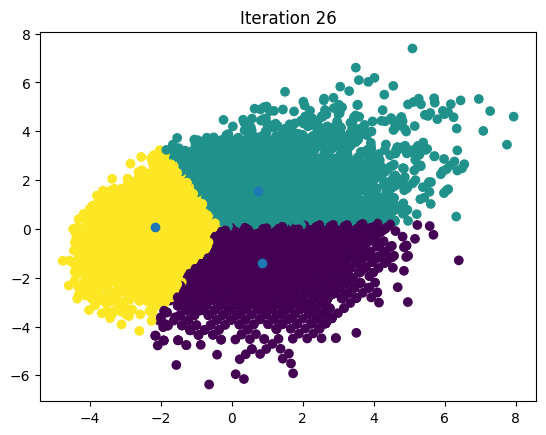

In [34]:
max_iterations =100
k=3
centroid=randomCentroids(data,k)
old_centroid=pd.DataFrame()
iteration=1

while iteration<max_iterations and not centroid.equals(old_centroid):
    old_centroid=centroid
    labels=getLabels(data,centroid)
    centroid=new_centroids(data,labels,k)
    plotCluster(data,labels,centroid,iteration)
    iteration=iteration+1

In [39]:
players[labels==1][['short_name']+features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
13245,D. Scarlett,63,86,3000.0,1500000.0,17
13256,L. Bate,63,83,5000.0,1300000.0,18
13351,Llabrés,63,81,3000.0,1200000.0,19
14144,H. Mejbri,62,84,6000.0,1300000.0,18


In [35]:
centroid

,0,1,2
overall,4.784633,5.806043,3.206838
potential,4.506962,6.497993,4.928473
wage_eur,1.118904,1.420001,1.028505
value_eur,1.044980,1.285501,1.026614
age,5.472247,3.596161,2.518708


In [41]:
from sklearn.cluster import KMeans

kmeans=KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

centroid=kmeans.cluster_centers_

pd.DataFrame(centroid,columns=features)



/Users/huseyin/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'KMeans' object has no attribute 'n_cluster_centers_'